In [1]:
import numpy as np
import py4dgeo, laspy
import pickle
from tqdm import tqdm
import os, sys
sys.path.append('../src')
import helper, classes, metric, statistic, params

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
# Scale parameters are diameters in CloudCompare and radii in py4dgeo
# _cloudcompare_param_mapping = {
#     "normalscale": "normal_radii",
#     "registrationerror": "reg_error",
#     "searchdepth": "max_distance",
#     "searchscale": "cyl_radii", (projection scale)
#     "usemedian": "robust_aggr",
# }

# class M3C2LikeAlgorithm(abc.ABC):
#     def __init__(
#         self,
#         epochs: typing.Tuple[Epoch, ...] = None,
#         corepoints: np.ndarray = None,
#         cyl_radii: typing.List[float] = None,
#         max_distance: float = 0.0,
#         registration_error: float = 0.0,

# m3c2 = py4dgeo.M3C2(epochs=(epoch1, epoch2),
#                 corepoints=corepoints,
#                 cyl_radii=(0.21,),
#                 normal_radii=(0.2, 0.4, 0.8), # multi scale search ("compute_multiscale_directions()")
#                 max_distance=10
#                 )


# Cloud Compare Params:  
# [General]
# M3C2VER=1
# NormalScale=0.84121 --> what we use in Cloud Compare
# NormalMode=0

# NormalMinScale=0.420605   --> what would be used had we activated multi-scale calculation mode
# NormalStep=0.420605       --> s.o.
# NormalMaxScale=1.682421   --> s.o.

# NormalUseCorePoints=false
# NormalPreferedOri=4
# SearchScale=0.420605 --> == 2 * cycle_radii
# SearchDepth=17.368847
# SubsampleRadius=0.015
# SubsampleEnabled=true
# RegistrationError=0

##### Create class wise point clouds 

In [3]:
synth_pc_path = params.DEFAULT_SYNTH_PC_PATH
real_pc_path = params.DEFAULT_REAL_PC_PATH

In [5]:
real_points_all_classes, synth_points_all_classes = helper.import_and_prepare_point_clouds(real_pc_path, synth_pc_path,  crop=True)
real_points_class_wise = metric.class_split_pc(real_points_all_classes, type='real')
synth_points_class_wise = metric.class_split_pc(synth_points_all_classes, type='synth')

##### M3C2

In [6]:
distances_medians, distances_all, uncertainties_all, skipped_classes = metric.m3c2_class_wise(real_points_class_wise, synth_points_class_wise)

INFO:root:	M3C2: Calculating distances...
		100%|██████████


##### Cloud-to-Cloud

In [7]:
c2c_median_distance, c2c_mean_dist, c2c_stdev = metric.cloud_to_cloud_distance(real_points_all_classes, synth_points_all_classes)

INFO:root:	C2C: Creating Open3D Point Clouds
INFO:root:	C2C: Calculating Cloud-to-Cloud Distance


##### Data Set Statistics

How are datapoints distributed between training, validation, and test datasets?

In [2]:
path_train_1 = '/home/Meins/Uni/TUM/SS23/Data Lab/Labelling/Label-Datasets/train/Train1 - labelled.las'
path_train_2 = '/home/Meins/Uni/TUM/SS23/Data Lab/Labelling/Label-Datasets/train/train2-labeled.las'
path_valid = '/home/Meins/Uni/TUM/SS23/Data Lab/Labelling/Label-Datasets/valid/validation_classified_merge_cut.las'
path_test = '/home/Meins/Uni/TUM/SS23/Data Lab/Labelling/Label-Datasets/test/test-merged.las'

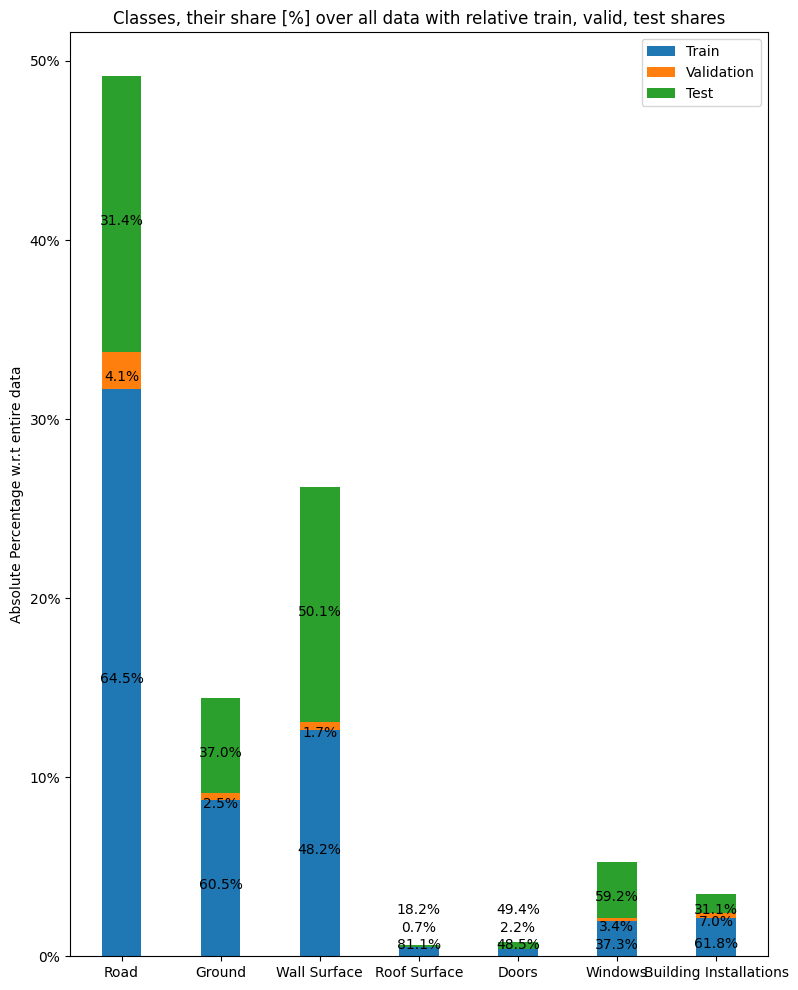

In [3]:
output = statistic.compute_data_distribution(path_train_1, path_train_2, path_valid, path_test, display_bar_percentage=True)